# Covid data analysis

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('E:/Learning/HANDS ON PROJECTS/PYTHON/EDA/Covid/covid.csv')

In [3]:
df

,Date,State,Region,Confirmed,Deaths,Recovered
0,4/29/2020,NaN,Afghanistan,1939,60,252
1,4/29/2020,NaN,Albania,766,30,455
2,4/29/2020,NaN,Algeria,3848,444,1702
3,4/29/2020,NaN,Andorra,743,42,423
4,4/29/2020,NaN,Angola,27,2,7
...,...,...,...,...,...,...
316,4/29/2020,Wyoming,US,545,7,0
317,4/29/2020,Xinjiang,Mainland China,76,3,73
318,4/29/2020,Yukon,Canada,11,0,0
319,4/29/2020,Yunnan,Mainland China,185,2,181


In [5]:
df.info()                                                                         

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 321 entries, 0 to 320
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Date       321 non-null    object
 1   State      140 non-null    object
 2   Region     321 non-null    object
 3   Confirmed  321 non-null    int64 
 4   Deaths     321 non-null    int64 
 5   Recovered  321 non-null    int64 
dtypes: int64(3), object(3)
memory usage: 15.2+ KB


In [7]:
df.describe()

,Confirmed,Deaths,Recovered
count,321.000000,321.000000,321.000000
mean,9949.800623,709.152648,3030.277259
std,31923.853086,3236.162817,14364.870365
min,0.000000,0.000000,0.000000
25%,104.000000,2.000000,2.000000
50%,653.000000,12.000000,73.000000
75%,4655.000000,144.000000,587.000000
max,299691.000000,27682.000000,132929.000000


In [8]:
# convert the date column from object type to date type

df.Date = pd.to_datetime(df['Date'])

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 321 entries, 0 to 320
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       321 non-null    datetime64[ns]
 1   State      140 non-null    object        
 2   Region     321 non-null    object        
 3   Confirmed  321 non-null    int64         
 4   Deaths     321 non-null    int64         
 5   Recovered  321 non-null    int64         
dtypes: datetime64[ns](1), int64(3), object(2)
memory usage: 15.2+ KB


In [10]:
df.head()

,Date,State,Region,Confirmed,Deaths,Recovered
0,2020-04-29,NaN,Afghanistan,1939,60,252
1,2020-04-29,NaN,Albania,766,30,455
2,2020-04-29,NaN,Algeria,3848,444,1702
3,2020-04-29,NaN,Andorra,743,42,423
4,2020-04-29,NaN,Angola,27,2,7


In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot:>

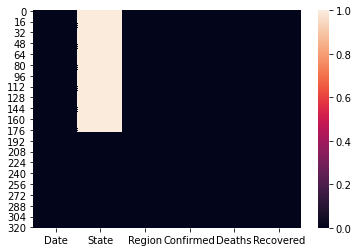

In [16]:
# We can visualise null values with heat map

sns.heatmap(df.isnull(), color = 'blue')

# we can see that 181 null values in states are present. It cannot be shown accurately, but you get the gist.

### Q 1. Show the number of 'Confirmed', 'Deaths', 'Recovered' cases in each Region

In [32]:
df.groupby('Region')[['Confirmed', 'Deaths', 'Recovered']].sum().sort_values('Confirmed', ascending = False)

,Confirmed,Deaths,Recovered
Region,,,
US,1039909,60967,120720
Spain,236899,24275,132929
Italy,203591,27682,71252
France,166543,24121,49118
UK,166441,26166,857
...,...,...,...
Sao Tome and Principe,8,0,4
Papua New Guinea,8,0,0
Bhutan,7,0,5


### Q 2. Remove all the cases where 'Confirmed' cases are less than '10'

In [50]:
df = df[~(df.Confirmed < 10)]

In [51]:
(df.Confirmed < 10).sum()

0

### Q 3. Which 'Region' recorded maximum number of 'Confirmed' cases?

In [53]:
df.groupby('Region')['Confirmed'].sum().sort_values(ascending = False).head(1)

Region
US    1039909
Name: Confirmed, dtype: int64

### Q 4. Which 'Region' recorded minimum number of 'Deaths'?

In [67]:
df[df['Deaths'] == 1].groupby('Region')['Deaths'].sum().sort_values(ascending = True)

Region
Benin                1
Botswana             1
Brunei               1
Burundi              1
Cabo Verde           1
Equatorial Guinea    1
Eswatini             1
France               1
Gambia               1
Guinea-Bissau        1
Liechtenstein        1
Maldives             1
Netherlands          1
Suriname             1
UK                   3
Mainland China       5
Name: Deaths, dtype: int64

### Q 5. How many 'Confirmed', 'Deaths' and 'Recovered' cases reported from 'India' till 29th Apr, 2020?

In [70]:
df

,Date,State,Region,Confirmed,Deaths,Recovered
0,2020-04-29,NaN,Afghanistan,1939,60,252
1,2020-04-29,NaN,Albania,766,30,455
2,2020-04-29,NaN,Algeria,3848,444,1702
3,2020-04-29,NaN,Andorra,743,42,423
4,2020-04-29,NaN,Angola,27,2,7
...,...,...,...,...,...,...
316,2020-04-29,Wyoming,US,545,7,0
317,2020-04-29,Xinjiang,Mainland China,76,3,73
318,2020-04-29,Yukon,Canada,11,0,0
319,2020-04-29,Yunnan,Mainland China,185,2,181


In [107]:
df[(df['Date'] >= '2020-04-29') & (df['Region'] == 'India')]

,Date,State,Region,Confirmed,Deaths,Recovered
74,2020-04-29,NaN,India,33062,1079,8437


In [110]:
df.Date.nunique()

1

### Q 6. Sort the entire data wrt (with respect to) No. of 'Confirmed' cases in ascending order.

In [122]:
df.sort_values('Confirmed', ascending = True)

,Date,State,Region,Confirmed,Deaths,Recovered
156,2020-04-29,NaN,Suriname,10,1,8
70,2020-04-29,NaN,Holy See,10,0,2
59,2020-04-29,NaN,Gambia,10,1,8
318,2020-04-29,Yukon,Canada,11,0,0
217,2020-04-29,Greenland,Denmark,11,0,11
...,...,...,...,...,...,...
57,2020-04-29,NaN,France,165093,24087,48228
168,2020-04-29,NaN,UK,165221,26097,0
80,2020-04-29,NaN,Italy,203591,27682,71252
153,2020-04-29,NaN,Spain,236899,24275,132929


### Q 7. Sort the entire data wrt No. of 'Recovered' cases in descending order.

In [126]:
df.sort_values('Recovered', ascending = False)

,Date,State,Region,Confirmed,Deaths,Recovered
153,2020-04-29,NaN,Spain,236899,24275,132929
61,2020-04-29,NaN,Germany,161539,6467,120400
76,2020-04-29,NaN,Iran,93657,5957,73791
80,2020-04-29,NaN,Italy,203591,27682,71252
229,2020-04-29,Hubei,Mainland China,68128,4512,63616
...,...,...,...,...,...,...
258,2020-04-29,Nevada,US,4934,230,0
257,2020-04-29,Nebraska,US,3851,56,0
255,2020-04-29,Montana,US,451,16,0
254,2020-04-29,Missouri,US,7660,338,0
